## Community analysis of similarity graph

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import numpy as np
import itertools
import pickle
import json

data = pd.read_csv('all_hashtags_combined.csv')
G = nx.read_gpickle("Our_Gragh_0.4Sim")

In [2]:
def quick_summary_of_subgraph(G, data):
    tweets = data[data['user_id'].isin(G.nodes())]
    
    word_count = {}
    for t in tweets.text:
        if type(t) == str:
            parts = t.split(' ')
            for p in parts:
                value = word_count.get(p, None)
                if value == None:
                    word_count[p] = 1
                else:
                    word_count[p] = value + 1
                
    loc_count = {}            
    for userid in G.nodes():
        loc = data[data['user_id'] == userid].location.iloc[0]
        value = loc_count.get(loc, None)
        if value == None:
            loc_count[loc] = 1
        else:
            loc_count[loc] = value + 1
            
    ht_count = {}
    for ht in tweets.tweet_hashtags:
        if type(ht) == str:
            parts = ht.split(' ')
            for p in parts:
                value = ht_count.get(p, None)
                if value == None:
                    ht_count[p] = 1
                else:
                    ht_count[p] = value + 1
        
    print("### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###")
    wordsort = sorted(word_count.items(), key=(lambda k: k[1]), reverse=True)
    print({k: v for k,v in wordsort if v > 1})
    print("\n### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###")
    print(sorted(loc_count.items(), key=(lambda k: k[1]), reverse=True))
    print("\n### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###")
    htsort = sorted(ht_count.items(), key=(lambda k: k[1]), reverse=True)
    print({k: v for k,v in htsort if v > 1})
    print("\n### TWEETS ###")
    display(tweets)

def get_labels(G, data):
    labels = {}
    for n in G.nodes():
        labels[n] = data[data['user_id'] == n].username.iloc[0]
    return labels

## Clique

In [3]:
cliqs = list(nx.find_cliques(G)) # All cliques
cliqs = sorted(cliqs, key=len, reverse=True)

In [4]:
len(cliqs)

312

In [ ]:
# Checking clique sizes from largest to smallest
for c in cliqs:
    print(len(c))

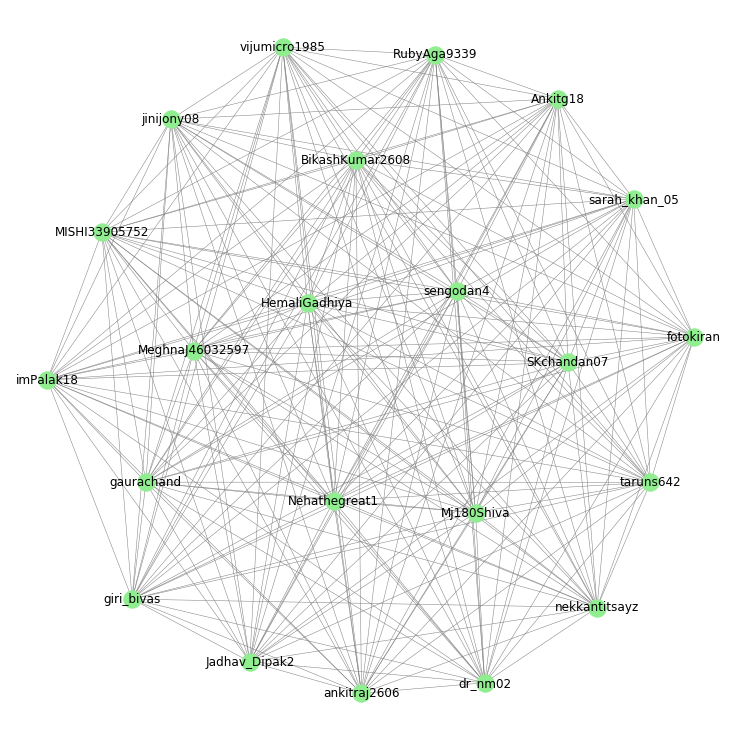

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'6': 22, 'cars': 22, '': 16, 'join': 16, 'ans': 4, 'total': 2}

### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###
[(nan, 3), ('indore, india', 2), ('hyderabad, india', 2), ('ranchi, india', 1), ('kolkata, india', 1), ('मुंबई, भारत', 1), ('rajasthan, india', 1), ('indai', 1), ('देवघर ', 1), ('delhi ncr', 1), ('kollam, india', 1), ('ahmedabad', 1), ('mumbai', 1), ('mumbai, india', 1), ('india', 1), ('aurangabad, india', 1), ('kolkata', 1), ('karnal, haryana', 1)]

### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###
{'#parkwheels': 22, '#parking': 22, '#challenge': 22, '#contestalert': 16, '#puzzle': 10, '#findthecar': 10, '#findpuzzle': 10, '#contest': 10, '#contesttime': 10}

### TWEETS ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446
84,2020-04-10 09:58:42,1210276287278796800,MISHI33905752,6 cars join,2,6,#contestalert #parkwheels #parking #challenge,NaN,1210276287278796800


In [6]:
plt.rcParams['figure.figsize'] = (10, 10)

# Competition clique
clique_graph = G.subgraph(cliqs[0])
pos = nx.spring_layout(clique_graph)
nx.draw(clique_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_labels(clique_graph, pos, labels=get_labels(clique_graph, data))
plt.show()
quick_summary_of_subgraph(clique_graph, data)

In [7]:
# Commented out code = manual checking

In [8]:
#clique_graph = G.subgraph(cliqs[6])
#pos = nx.spring_layout(clique_graph)
#nx.draw(clique_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_labels(clique_graph, pos, labels=get_labels(clique_graph, data))
#plt.show()
#quick_summary_of_subgraph(clique_graph, data)

In [9]:
#clique_graph = G.subgraph(cliqs[21])
#pos = nx.spring_layout(clique_graph)
#nx.draw(clique_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_labels(clique_graph, pos, labels=get_labels(clique_graph, data))
#plt.show()
#quick_summary_of_subgraph(clique_graph, data)

In [10]:
#clique_graph = G.subgraph(cliqs[26])
#pos = nx.spring_layout(clique_graph)
#nx.draw(clique_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_labels(clique_graph, pos, labels=get_labels(clique_graph, data))
#plt.show()
#quick_summary_of_subgraph(clique_graph, data)

## K-plex

In [11]:
# Note that the 2-plexes are in a separate text file, called 2plexes_similarity_graph

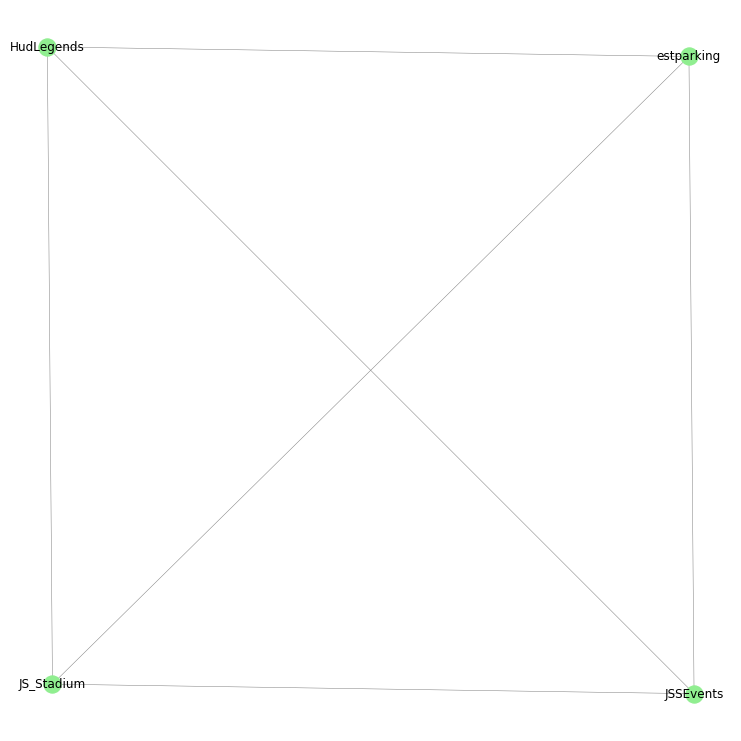

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'parking': 56, 'saturday': 30, 'book': 29, 'prebook': 26, 'attending': 21, 'concert': 21, 'june': 21, '27th': 20, 'pre': 16, 'heading': 16, 'forward': 14, 'look': 13, 'seeing': 13, '': 10, 'stadium': 10, 'v': 9, '2020': 9, 'need': 9, 'game': 8, 'february': 8, 'avoid': 7, 'disappointment': 7, 'day': 7, 'friday': 6, 'now': 6, 'january': 4, 'sheffield': 3, 'wednesday': 3, 'yet': 3, 'sale': 3, 'sharks': 3, 'aj': 3, 'bell': 3, 'watch': 3, '21st': 3, 'this': 3, 'sixways': 3, 'hillsborough': 2, 'harlequins': 2, 'go': 2, 'leicester': 2, 'ricoh': 2, 'arena': 2, 'molineux': 2, 'warriors': 2, '15th': 2, '18th': 2, 'tomorrow': 2}

### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###
[('huddersfield, england', 2), ('england, united kingdom', 1), ('huddersfield ', 1)]

### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###
{'#parking': 44, '#concert': 24, '#greenday': 24, '#hudd

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
1294,2020-03-25 10:45:06,1126200918423240704,estparking,look forward seeing prebook parking,0,2,#concert #parking #june2020,"england, united kingdom",1126200918423240704
1390,2020-03-24 12:00:11,1178609126932389888,JS_Stadium,attending concert saturday 27th june pre book ...,0,2,#greenday #concert #parking #june #huddersfield,huddersfield,1178609126932389888
1678,2020-03-20 09:00:07,1178609126932389888,JS_Stadium,attending concert saturday 27th june pre book ...,0,1,#greenday #concert #parking #june #huddersfield,huddersfield,1178609126932389888
2063,2020-03-16 14:44:56,1126200918423240704,estparking,book parking,1,2,#greenday #parking #concerts #june #summer,"england, united kingdom",1126200918423240704
2085,2020-03-16 12:00:10,1178609126932389888,JS_Stadium,attending concert saturday 27th june pre book ...,0,1,#greenday #concert #parking #june #huddersfield,huddersfield,1178609126932389888
2540,2020-03-11 09:50:07,3433279527,HudLegends,attending concert saturday 27th june prebook p...,0,0,#greenday #concert #parking #huddersfield,"huddersfield, england",3433279527
2670,2020-03-10 09:49:25,1126200918423240704,estparking,heading sheffield wednesday v nottingham fores...,0,1,#sheffield #football #parking,"england, united kingdom",1126200918423240704
2671,2020-03-10 09:44:40,1126200918423240704,estparking,heading sale sharks v harlequins game sunday a...,1,2,#salesharks #rugby #parking #ajbell #manchester,"england, united kingdom",1126200918423240704
2779,2020-03-09 09:50:05,831991976404860928,JSSEvents,attending concert saturday 27th june pre book ...,0,0,#greenday #concert #parking #june #huddersfield,"huddersfield, england",831991976404860928
3169,2020-03-05 09:00:13,1178609126932389888,JS_Stadium,attending concert saturday 27th june pre book ...,0,3,#greenday #concert #parking #june #huddersfield,huddersfield,1178609126932389888


In [12]:
#Manually checking different plexes...

plex = [1126200918423240704, 1178609126932389888, 831991976404860928, 3433279527]

plt.rcParams['figure.figsize'] = (10, 10)
plex_graph = G.subgraph(plex)
pos = nx.spring_layout(plex_graph)
nx.draw(plex_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_labels(plex_graph, pos, labels=get_labels(plex_graph, data))
plt.show()
quick_summary_of_subgraph(plex_graph, data)

In [13]:
#plex = [780011379528962048, 788651302553280512, 923833156834414595, 2482631628]
#plex_graph = G.subgraph(plex)
#pos = nx.spring_layout(plex_graph)
#nx.draw(plex_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
#nx.draw_networkx_labels(plex_graph, pos, labels=get_labels(plex_graph, data))
##plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(plex_graph, data)

## K-core

In [14]:
k_core_graph = nx.k_core(G)

In [15]:
min(k_core_graph.degree(), key=(lambda k: k[1]))[1] # Checking the value of k

21

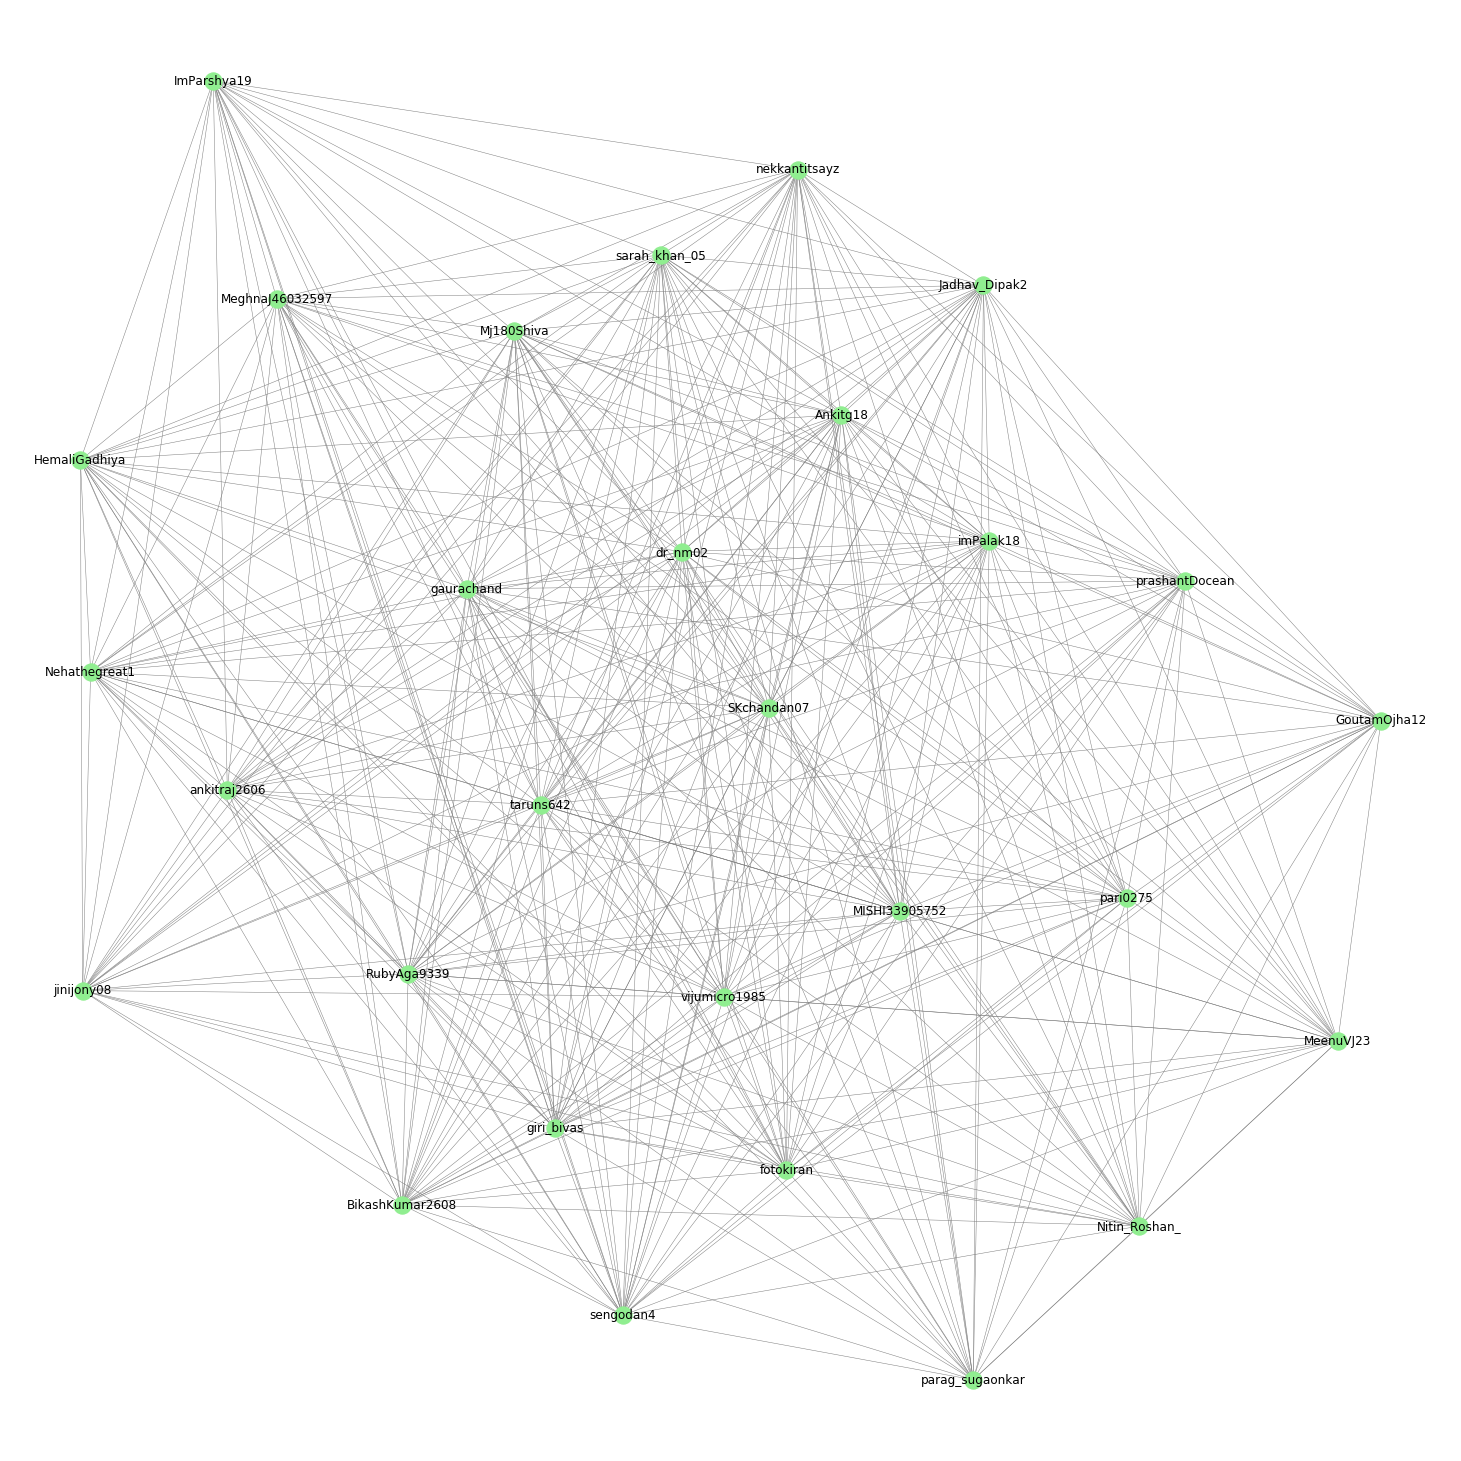

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'6': 29, 'cars': 29, 'join': 17, '': 16, 'ans': 4, 'tagging': 4, 'total': 3, 'friends': 2, 'found': 2}

### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###
[(nan, 4), ('kolkata, india', 2), ('hyderabad, india', 2), ('india', 2), ('indore, india', 2), ('ranchi, india', 1), ('rajasthan, india', 1), ('dahisar east, mumbai', 1), ('indai', 1), ('देवघर ', 1), ('chennai, india', 1), ('delhi ncr', 1), ('kollam, india', 1), ('ahmedabad', 1), ('bengaluru, india', 1), ('mumbai', 1), ('mumbai, india', 1), ('aurangabad, india', 1), ('kolkata', 1), ('मुंबई, भारत', 1), ('pune, india', 1), ('karnal, haryana', 1)]

### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###
{'#parkwheels': 29, '#parking': 29, '#challenge': 29, '#contestalert': 19, '#puzzle': 15, '#findthecar': 15, '#findpuzzle': 15, '#contest': 15, '#contesttime': 15}

### TWEETS ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446


In [16]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(k_core_graph)
nx.draw(k_core_graph, pos, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_labels(k_core_graph, pos, labels=get_labels(k_core_graph, data))
plt.savefig("largest_k_core_similarity_graph.png")
plt.show()
quick_summary_of_subgraph(k_core_graph, data)

## Girvan-Newman

In [17]:
# Observing sizes of different components
for k in nx.connected_components(G):
    print(len(k), end= ' ')

46 168 2 2 2 3 2 2 2 2 2 2 16 2 10 4 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 3 2 2 2 9 2 2 2 3 5 2 2 2 2 2 2 2 2 2 2 2 2 4 2 3 2 5 2 2 2 2 2 2 2 3 3 2 4 3 2 2 3 2 3 2 2 3 3 2 3 2 2 2 3 3 3 2 2 2 2 3 4 2 2 2 2 2 4 3 2 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 7 2 2 3 2 3 2 2 

In [18]:
# It was observed that when given the whole graph to the algorithm, largest subgraph kept splitting for quite some time, so in the end algorithm was run to the largest subgraph

largest_subgraph = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
comp = community.girvan_newman(largest_subgraph)
levels = []
for i in range(10):
    levels.append(tuple(sorted(c) for c in next(comp)))

In [19]:
# Printing sizes of communities on first 20 levels of algorithm
for level in levels:
    for l in level:
        print(len(l), end = ' ')
    print()

104 64 
68 36 64 
68 36 20 44 
62 36 20 6 44 
56 36 20 6 6 44 
8 48 36 20 6 6 44 
8 48 36 20 6 6 39 5 
8 44 4 36 20 6 6 39 5 
8 41 4 3 36 20 6 6 39 5 
8 35 4 3 36 20 6 6 39 5 6 


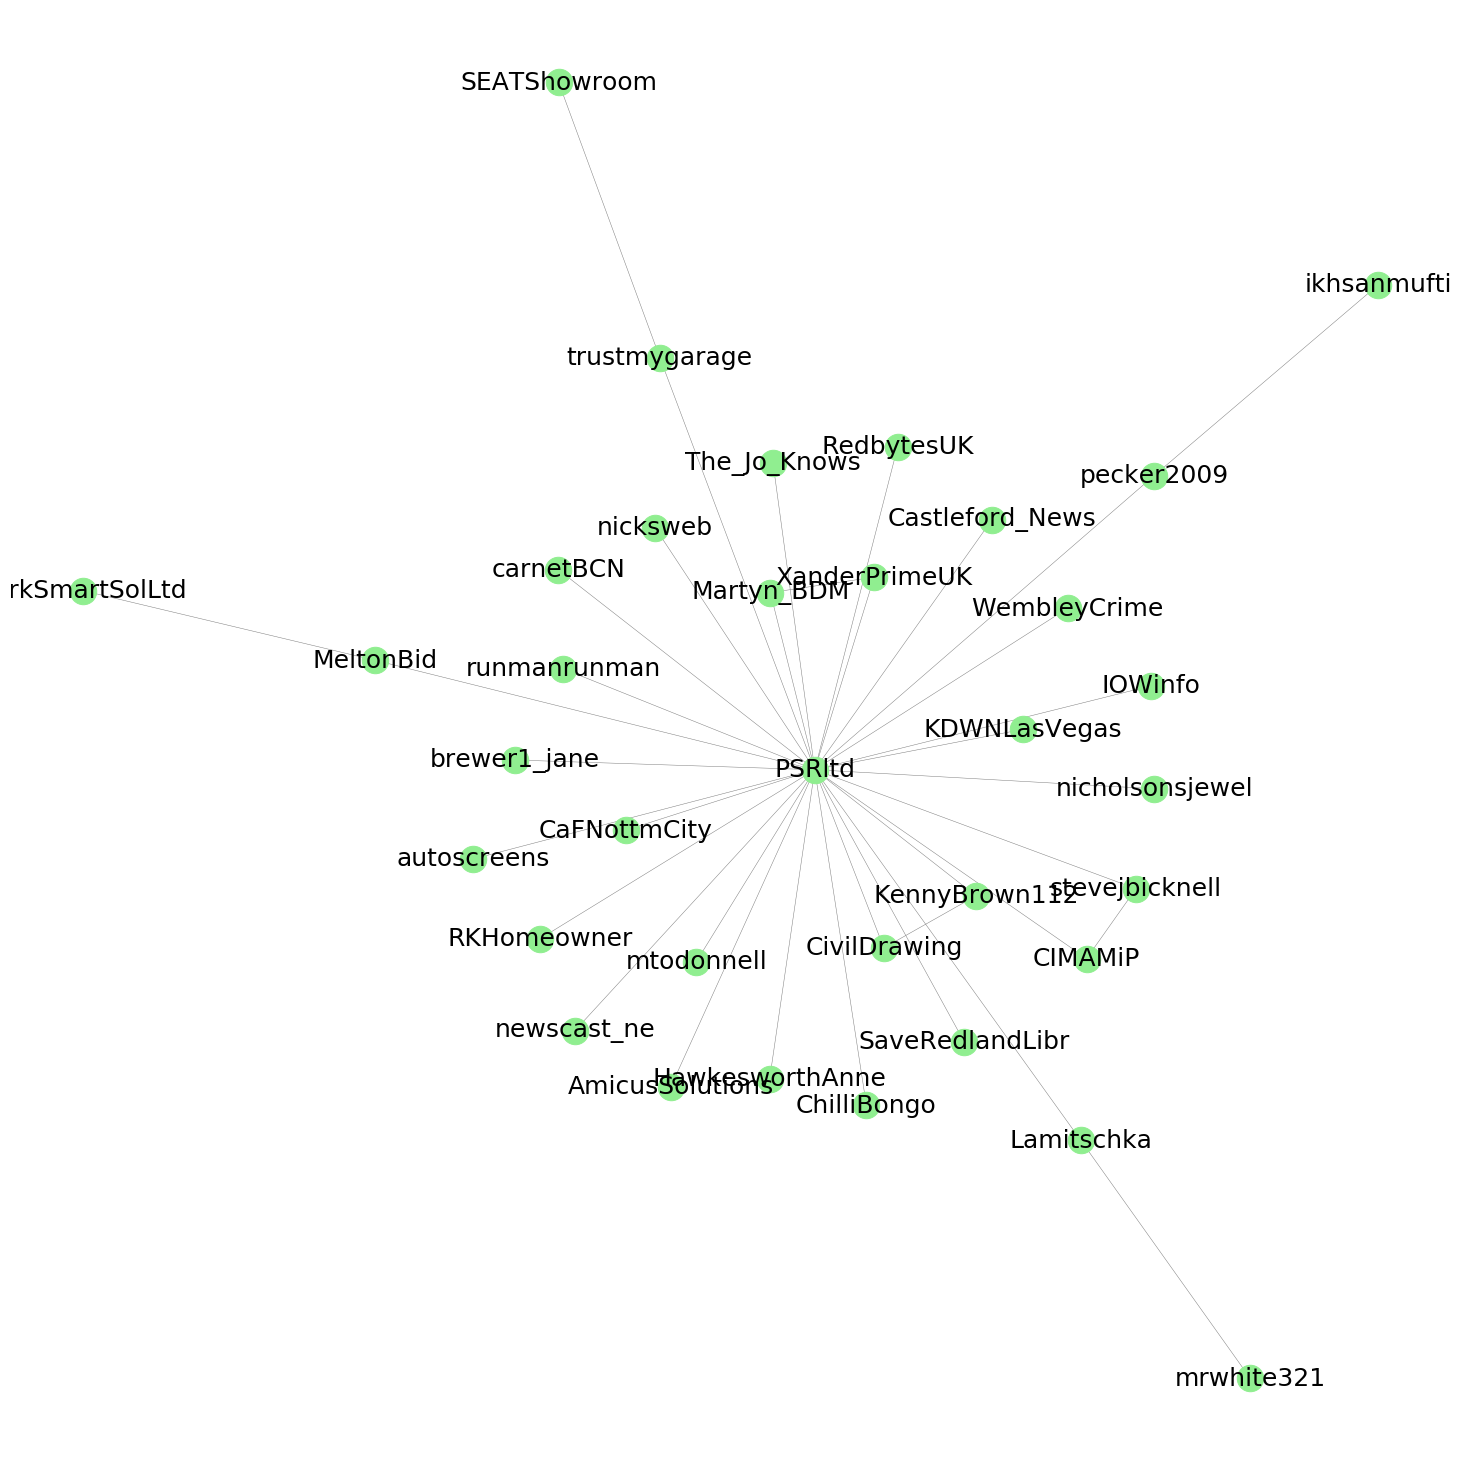

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'car': 163, '': 128, 'park': 87, 'private': 80, 'parking': 77, 'free': 76, 'spaces': 72, 's': 66, 'charges': 58, 'new': 50, 'invoices': 47, 'unfair': 47, 'fight': 38, 'city': 35, 'amp': 34, 'get': 34, 'could': 32, 'fines': 30, 'fine': 27, 'plans': 27, 'staff': 27, 'centre': 26, 'permits': 26, 'town': 25, 'permit': 25, 'operators': 24, 'space': 24, 'speculative': 24, 'operator': 23, 'residents': 22, 'parks': 22, 'scheme': 21, 'charge': 21, 'set': 20, 'issued': 20, 'street': 20, 'nt': 19, 'carpark': 19, 'council': 18, 'year': 18, 'rules': 18, 'ticket': 18, 'increase': 18, 'drivers': 18, 'pay': 17, 'across': 16, 'changes': 16, 'one': 16, 'pavement': 15, 'tax': 15, 'home': 15, 'plan': 14, 'stop': 14, 'motorists': 14, 'restrictions': 14, 'tickets': 14, 'penalties': 14, 'road': 13, 'people': 12, 'hit': 12, 'vehicles': 12, 'rogue': 12, 'make': 12, 'invoice': 11, 'ban': 11, 'fees': 11, 'cancelled

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
0,2020-04-11 11:37:20,175351371,PSRltd,work £250000 improvement plan parked trust app...,0,0,#mull #iona #community #argyll #bute #council ...,0161 401 4000,175351371
51,2020-04-10 14:44:17,175351371,PSRltd,charges suspended,0,0,#fife #parking,0161 401 4000,175351371
56,2020-04-10 13:58:17,175351371,PSRltd,calls residents help key workers buddy scheme,0,0,#portsmouth #parking,0161 401 4000,175351371
68,2020-04-10 12:42:41,175351371,PSRltd,new website lets care workers find free spaces,1,0,#parking #altrincham,0161 401 4000,175351371
165,2020-04-09 12:24:33,175351371,PSRltd,fedup resident paints keap claer road stop p...,0,0,#middlesbrough #parking #badparking,0161 401 4000,175351371
166,2020-04-09 12:10:04,175351371,PSRltd,motorists warned expect tougher approach incon...,0,0,#suffolk #parking #councils #badparking,0161 401 4000,175351371
168,2020-04-09 11:51:55,175351371,PSRltd,locking gates led illegal,0,0,#parking #sthelens #badparking,0161 401 4000,175351371
169,2020-04-09 11:39:25,72151962,pecker2009,parking invoice appeals put hold operators ban...,1,1,#parking,bude,72151962
170,2020-04-09 11:38:38,175351371,PSRltd,slams john radcliffe s car policy,0,0,#coronavirus #nurse #hospital #parking #oxford,0161 401 4000,175351371
250,2020-04-08 12:22:18,175351371,PSRltd,revealed six prohibited spots uk,0,0,#parking,0161 401 4000,175351371


In [20]:
# Several communities were checked manually

gn_graph = G.subgraph(levels[9][1])
pos = nx.spring_layout(gn_graph)
nx.draw(gn_graph, pos, node_size = 700, with_labels=False, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_labels(gn_graph, pos, labels=get_labels(gn_graph, data), font_size=25)
plt.savefig("user_network_girvan_level10_community2.png")
plt.show()
quick_summary_of_subgraph(gn_graph, data)

In [21]:
# This was used to check, whether anyone in a given group of nodes belonged to a given user's followers

#with open('users_and_followers_215.json', 'r') as file:
#    user_and_followers = json.load(file)
#
#[u for u in list(get_labels(gn_graph, data).values()) if u in user_and_followers['PSRltd']]